In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt

from adtk.data import validate_series
from adtk.visualization import plot
from statsmodels.graphics import tsaplots

%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [21]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("./Covid 19 Confirmed Cases-Kerala.csv")

In [3]:
df.set_index(pd.to_datetime(df['Date']), inplace=True)

In [4]:
df = df[df['Date'] >= '2020-10-15']

[<AxesSubplot:>]

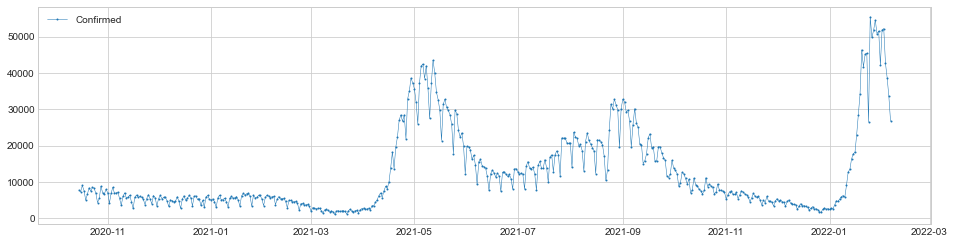

In [5]:
plot(validate_series(df['Confirmed']))

### ACF

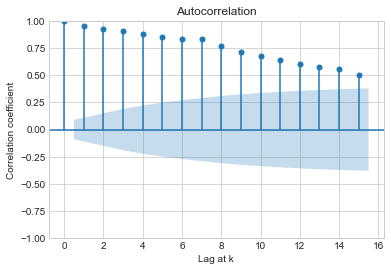

In [8]:
acf = tsaplots.plot_acf(df["Confirmed"], lags=15)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

### PACF

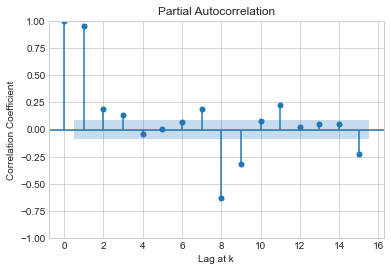

In [22]:
pacf = tsaplots.plot_pacf(df["Confirmed"], lags=15)

plt.title("Partial Autocorrelation")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();

## Modeling

In [12]:
# log-likelyhood test
def LLR_test(model_1, model_2, DF=1):
    
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = (2 * (L2 - L1))
    p = chi2.sf(LR, DF).round(3)
    
    return p

In [13]:
from arch import arch_model

In [23]:
model_arch_1 = arch_model(df['Confirmed'][1:])
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 4963.62456250377
Iteration:     10,   Func. Count:     55,   Neg. LLF: 4963.521108234895
Iteration:     15,   Func. Count:     80,   Neg. LLF: 4915.433052557872
Iteration:     20,   Func. Count:    107,   Neg. LLF: 4730.06846857285
Iteration:     25,   Func. Count:    133,   Neg. LLF: 4730.06088745731
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4730.060886034684
            Iterations: 27
            Function evaluations: 142
            Gradient evaluations: 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4730.06
Distribution:                  Normal   AIC:                           9468.12
Method:            Maximum Likelihood   BIC:                           9484.81
                                        No. Observations:                  479
Date:                Tue, Feb 22 2022   Df Residuals:                      478
Time:                        12:18:57   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          5344.9711    139.777     38.239      0.000 [5.071e+03,5.619e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.5340e+06  9.807e+05      2.584  9.771e-03 [6.118e+05,4.456e+06]
alpha[1]       0.8514  7.080e-02     12.025  2.618e-33     [  0.713,  0.990]
beta[1]        0.1311  6.635e-02      1.976  4.810e-02   [1.096e-03,  0.261]
============================================================================

Covariance estimator: robust
"""

## A Simple ARCH(1)

In [24]:
model_arch_1 = arch_model(df.Confirmed[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     23,   Neg. LLF: 4981.296846422247
Iteration:     10,   Func. Count:     43,   Neg. LLF: 4978.360953421245
Iteration:     15,   Func. Count:     65,   Neg. LLF: 4845.775424665895
Iteration:     20,   Func. Count:     85,   Neg. LLF: 4823.992410155258
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4823.989992165479
            Iterations: 23
            Function evaluations: 96
            Gradient evaluations: 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4823.99
Distribution:                  Normal   AIC:                           9653.98
Method:            Maximum Likelihood   BIC:                           9666.50
                                        No. Observations:                  479
Date:                Tue, Feb 22 2022   Df Residuals:                      478
Time:                        12:20:22   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          5731.7098    145.712     39.336      0.000 [5.446e+03,6.017e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.2670e+07  1.416e+06      8.949  3.586e-19 [9.895e+06,1.545e+07]
alpha[1]       0.8994  5.718e-02     15.730  9.451e-56     [  0.787,  1.011]
============================================================================

Covariance estimator: robust
"""

## higher-order arch models

In [25]:
model_arch_2 = arch_model(df.Confirmed[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     29,   Neg. LLF: 4971.398468728267
Iteration:     10,   Func. Count:     54,   Neg. LLF: 4970.597018947621
Iteration:     15,   Func. Count:     81,   Neg. LLF: 4818.101460621316
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4817.9721153167475
            Iterations: 18
            Function evaluations: 96
            Gradient evaluations: 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4817.97
Distribution:                  Normal   AIC:                           9643.94
Method:            Maximum Likelihood   BIC:                           9660.63
                                        No. Observations:                  479
Date:                Tue, Feb 22 2022   Df Residuals:                      478
Time:                        12:21:11   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          5767.0960    138.975     41.497      0.000 [5.495e+03,6.039e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.2670e+07  1.141e+06     11.100  1.252e-28 [1.043e+07,1.491e+07]
alpha[1]       0.5691  5.836e-02      9.752  1.801e-22     [  0.455,  0.684]
alpha[2]       0.2840  5.706e-02      4.977  6.465e-07     [  0.172,  0.396]
============================================================================

Covariance estimator: robust
"""

In [26]:
model_arch_13 = arch_model(df.Confirmed[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     83,   Neg. LLF: 4978.65478541494
Iteration:     10,   Func. Count:    166,   Neg. LLF: 4966.906607294626
Iteration:     15,   Func. Count:    246,   Neg. LLF: 4965.837059069552
Iteration:     20,   Func. Count:    327,   Neg. LLF: 4815.178353789208
Iteration:     25,   Func. Count:    408,   Neg. LLF: 4815.084164018417
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4815.084162922142
            Iterations: 27
            Function evaluations: 439
            Gradient evaluations: 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4815.08
Distribution:                  Normal   AIC:                           9660.17
Method:            Maximum Likelihood   BIC:                           9722.74
                                        No. Observations:                  479
Date:                Tue, Feb 22 2022   Df Residuals:                      478
Time:                        12:21:46   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          5782.7066    336.177     17.201  2.593e-66 [5.124e+03,6.442e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.2670e+07  2.152e+06      5.888  3.898e-09 [8.453e+06,1.689e+07]
alpha[1]       0.5260      0.134      3.922  8.785e-05     [  0.263,  0.789]
alpha[2]       0.0339      0.189      0.179      0.858     [ -0.337,  0.405]
alpha[3]       0.1453      0.230      0.632      0.527     [ -0.305,  0.596]
alpha[4]   1.7459e-12      0.342  5.109e-12      1.000     [ -0.670,  0.670]
alpha[5]   1.5029e-12      0.355  4.236e-12      1.000     [ -0.695,  0.695]
alpha[6]   1.8540e-11      0.740  2.505e-11      1.000     [ -1.451,  1.451]
alpha[7]       0.1189      0.971      0.122      0.903     [ -1.784,  2.022]
alpha[8]       0.0000      0.129      0.000      1.000     [ -0.253,  0.253]
alpha[9]       0.0000      0.542      0.000      1.000     [ -1.062,  1.062]
alpha[10]      0.0000      0.543      0.000      1.000     [ -1.065,  1.065]
alpha[11]      0.0000      0.655      0.000      1.000     [ -1.283,  1.283]
alpha[12]      0.0000      0.847      0.000      1.000     [ -1.661,  1.661]
alpha[13]      0.0000      0.622      0.000      1.000     [ -1.219,  1.219]
============================================================================

Covariance estimator: robust
"""

## A simple GARCH model 

![title](garch.png)

And most impactful model

In [29]:
model_garch_1_1 = arch_model(df.Confirmed[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 4963.62456250377
Iteration:     10,   Func. Count:     55,   Neg. LLF: 4963.521108234895
Iteration:     15,   Func. Count:     80,   Neg. LLF: 4915.433052557872
Iteration:     20,   Func. Count:    107,   Neg. LLF: 4730.06846857285
Iteration:     25,   Func. Count:    133,   Neg. LLF: 4730.06088745731
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4730.060886034684
            Iterations: 27
            Function evaluations: 142
            Gradient evaluations: 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4730.06
Distribution:                  Normal   AIC:                           9468.12
Method:            Maximum Likelihood   BIC:                           9484.81
                                        No. Observations:                  479
Date:                Tue, Feb 22 2022   Df Residuals:                      478
Time:                        12:33:14   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          5344.9711    139.777     38.239      0.000 [5.071e+03,5.619e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.5340e+06  9.807e+05      2.584  9.771e-03 [6.118e+05,4.456e+06]
alpha[1]       0.8514  7.080e-02     12.025  2.618e-33     [  0.713,  0.990]
beta[1]        0.1311  6.635e-02      1.976  4.810e-02   [1.096e-03,  0.261]
============================================================================

Covariance estimator: robust
"""

## Higher-lag GARCH models

In [31]:
model_garch_1_2 = arch_model(df.Confirmed[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 4962.335688368993
Iteration:     10,   Func. Count:     64,   Neg. LLF: 4962.301093242331
Iteration:     15,   Func. Count:     94,   Neg. LLF: 4960.677313034698
Iteration:     20,   Func. Count:    124,   Neg. LLF: 29532.876140576802
Iteration:     25,   Func. Count:    156,   Neg. LLF: 4738.882333874853
Iteration:     30,   Func. Count:    186,   Neg. LLF: 4727.072704761561
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4727.050793934461
            Iterations: 33
            Function evaluations: 203
            Gradient evaluations: 33


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4727.05
Distribution:                  Normal   AIC:                           9464.10
Method:            Maximum Likelihood   BIC:                           9484.96
                                        No. Observations:                  479
Date:                Tue, Feb 22 2022   Df Residuals:                      478
Time:                        12:33:53   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          5362.0204    141.220     37.969      0.000 [5.085e+03,5.639e+03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.5340e+06  1.721e+06      1.473      0.141 [-8.382e+05,5.906e+06]
alpha[1]       0.8227  8.743e-02      9.410  4.958e-21      [  0.651,  0.994]
beta[1]    5.8182e-12      0.505  1.152e-11      1.000      [ -0.990,  0.990]
beta[2]        0.1372      0.438      0.313      0.754      [ -0.722,  0.996]
=============================================================================

Covariance estimator: robust
"""

In [33]:
# 1, 3
model_garch_1_3 = arch_model(df.Confirmed[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 4962.844781323933
Iteration:     10,   Func. Count:     76,   Neg. LLF: 4962.376826194732
Iteration:     15,   Func. Count:    111,   Neg. LLF: 4962.306545670614
Iteration:     20,   Func. Count:    146,   Neg. LLF: 4961.15521747711
Iteration:     25,   Func. Count:    181,   Neg. LLF: 4825.7150783915695
Iteration:     30,   Func. Count:    216,   Neg. LLF: 4727.628275878449
Iteration:     35,   Func. Count:    252,   Neg. LLF: 4727.051332659659
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4727.05085794578
            Iterations: 40
            Function evaluations: 285
            Gradient evaluations: 39


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4727.05
Distribution:                  Normal   AIC:                           9466.10
Method:            Maximum Likelihood   BIC:                           9491.13
                                        No. Observations:                  479
Date:                Tue, Feb 22 2022   Df Residuals:                      478
Time:                        12:34:53   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          5363.2143    138.780     38.645      0.000 [5.091e+03,5.635e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.5340e+06  8.912e+05      2.843  4.464e-03 [7.873e+05,4.281e+06]
alpha[1]       0.8228  6.263e-02     13.136  2.039e-39     [  0.700,  0.946]
beta[1]    1.3012e-14      0.113  1.155e-13      1.000     [ -0.221,  0.221]
beta[2]        0.1372      0.108      1.271      0.204  [-7.439e-02,  0.349]
beta[3]    6.0218e-15      0.109  5.511e-14      1.000     [ -0.214,  0.214]
============================================================================

Covariance estimator: robust
"""

In [35]:
# 2, 1
model_garch_2_1 = arch_model(df.Confirmed[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 4963.625395857638
Iteration:     10,   Func. Count:     64,   Neg. LLF: 4962.887678579468
Iteration:     15,   Func. Count:     96,   Neg. LLF: 4942.1151506574115
Iteration:     20,   Func. Count:    127,   Neg. LLF: 4722.46600945552
Iteration:     25,   Func. Count:    157,   Neg. LLF: 4722.430640925409
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4722.430549451442
            Iterations: 25
            Function evaluations: 159
            Gradient evaluations: 25


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4722.43
Distribution:                  Normal   AIC:                           9454.86
Method:            Maximum Likelihood   BIC:                           9475.72
                                        No. Observations:                  479
Date:                Tue, Feb 22 2022   Df Residuals:                      478
Time:                        12:34:58   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          5332.2442    132.042     40.383      0.000 [5.073e+03,5.591e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.5340e+06  4.269e+05      5.935  2.934e-09 [1.697e+06,3.371e+06]
alpha[1]       0.6369  6.992e-02      9.108  8.388e-20     [  0.500,  0.774]
alpha[2]       0.3150      0.113      2.786  5.334e-03   [9.340e-02,  0.537]
beta[1]        0.0000      0.124      0.000      1.000     [ -0.244,  0.244]
============================================================================

Covariance estimator: robust
"""

In [36]:
model_garch_3_1 = arch_model(df.Confirmed[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 4963.674563065931
Iteration:     10,   Func. Count:     76,   Neg. LLF: 4963.351429366281
Iteration:     15,   Func. Count:    112,   Neg. LLF: 4938.663932588997
Iteration:     20,   Func. Count:    151,   Neg. LLF: 4861.409613055351
Iteration:     25,   Func. Count:    188,   Neg. LLF: 4718.604930111966
Iteration:     30,   Func. Count:    223,   Neg. LLF: 4717.771347112918
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4717.771347112918
            Iterations: 31
            Function evaluations: 229
            Gradient evaluations: 31


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4717.77
Distribution:                  Normal   AIC:                           9447.54
Method:            Maximum Likelihood   BIC:                           9472.57
                                        No. Observations:                  479
Date:                Tue, Feb 22 2022   Df Residuals:                      478
Time:                        12:35:28   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          5338.5298    139.349     38.311      0.000 [5.065e+03,5.612e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.5340e+06  3.310e+05      7.656  1.914e-14 [1.885e+06,3.183e+06]
alpha[1]       0.6038  7.904e-02      7.639  2.185e-14     [  0.449,  0.759]
alpha[2]       0.0000      0.132      0.000      1.000     [ -0.259,  0.259]
alpha[3]       0.3092      0.106      2.913  3.574e-03     [  0.101,  0.517]
beta[1]    1.1789e-15      0.126  9.338e-15      1.000     [ -0.247,  0.247]
============================================================================

Covariance estimator: robust
"""

References:
* https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/
* https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_modeling.html